<center><h1> Empirical Assignment 3</h1></center>

**Author(s):**
1. Belicia Rodriguez (belicia.rodriguez@emory.edu)

**Objectives**: This <ins>assignment</ins> aims at
 1. Familiarizing you with *sampling techniques* using the ```pandas``` and ```sklearn``` Python libraries;
 2. Use *GitHub* to retrieve and submit computer code.

**Instructions**:
 1. Read this post https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6 before attempting to answer these questions.
 2. Please write down your Python code and <ins>execute</ins> it in the cell below each question.
 
<center><h2> Questions</h2></center>

1. [5 points] Using the ```read_stata``` function from the ```pandas``` library in Python, download the ```ceosal2``` used in Assignment 1 using the address ```http://fmwww.bc.edu/ec-p/data/wooldridge/ceosal2.dta```. **Note:** You need a working connection to the internet.

In [1]:
import pandas as pd

# load ceosal2 
ceosal2 = pd.read_stata('http://fmwww.bc.edu/ec-p/data/wooldridge/ceosal2.dta')

2. [5 points] Verify that there are 94 CEOs who went to graduate school in your sample, i.e., 53.1073% of your sample, and that there are 172 CEOs with some college education, i.e., 97.175%.

In [54]:
# initialize empty array
df = []

# verifying 94 CEOs went to grad school
ceo_grad = (ceosal2.grad == 1).sum()
ceo_grad_perc = round(ceosal2['grad'].mean(),5)


# verifying 172 CEOs have some college
ceo_college = (ceosal2.college == 1).sum()
ceo_college_perc = round(ceosal2['college'].mean(),5)

# print information
print('CEOs who went to graduate school')
print(ceo_grad)
print(ceo_grad_perc)

print('CEOs who have some college')
print(ceo_college)
print(ceo_college_perc)

CEOs who went to graduate school
94
0.53107
CEOs who have some college
172
0.97175


3. [15 points] Importing the ```KFold``` function from ```sklearn.model_selection``` make 5 folds of the data with the seed equal to 42 and print the same two proportions of CEOs in the previous questions in each folds i.e the two proportions in the training and the two proportions in the test data sets. **Hint:** (1) Read https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html; (2) Use the ```to_numpy()``` function from the ```pandas``` library, and/or the ```iloc``` function for ```pandas``` data frames.

In [61]:
import numpy as np
from sklearn.model_selection import KFold

# covert ceosal2 from dataframe to array
ceosal2_array = ceosal2.to_numpy()

# create kfold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)
print(kf)

# create dataframe for storing the folds info
d = {'Fold' : [1,2,3,4,5], 'College Training' : [None] * 5, 'College Testing' : [None] * 5,
     'Grad Training': [None] * 5, 'Grad Testing': [None] * 5}
fold_df = pd.DataFrame(data = d)

# initiate counter for loop
i = 0

# split data into five folds
for train_index, test_index in kf.split(ceosal2_array):
    # divide dataframe into test and train
    ceo_xtrain = ceosal2.iloc[train_index]
    ceo_xtest = ceosal2.iloc[test_index]
    
    # store number of CEOS who went to college in each fold test ant training set
    fold_df.loc[i,['College Training']] = (ceo_xtrain.college).mean()
    fold_df.loc[i,['College Testing']] = (ceo_xtest.college).mean()
    fold_df.loc[i, ['Grad Training']] = (ceo_xtrain.grad).mean()
    fold_df.loc[i, ['Grad Testing']] = (ceo_xtest.grad).mean()
    
    # add to counter
    i = i + 1

# print dataframe with results
print(fold_df)

KFold(n_splits=5, random_state=42, shuffle=True)
   Fold College Training College Testing Grad Training Grad Testing
0     1         0.978723        0.944444      0.546099     0.472222
1     2         0.964539               1       0.51773     0.583333
2     3         0.971831        0.971429      0.528169     0.542857
3     4         0.978873        0.942857      0.535211     0.514286
4     5         0.964789               1      0.528169     0.542857


4. [5 points] Verify that in some of the 5 folds of the data you constructed before there are _no_ CEOs with *no* college education in either the train or the test data sets.

In [5]:
print(ceosal2[(ceosal2.college == 0) & (ceosal2.ceoten == 0)])

print('There are no observations where there are no CEOs with no college education.')

Empty DataFrame
Columns: [salary, age, college, grad, comten, ceoten, sales, profits, mktval, lsalary, lsales, lmktval, comtensq, ceotensq, profmarg]
Index: []
There are no observations where there are no CEOs with no college education.


5. [70 points] Estimate the following model

$$
\begin{aligned}
\texttt{lsalary} = \beta_0+\beta_1\texttt{lsales}+\beta_2\texttt{lmktval}+\beta_3\texttt{profmarg}+\beta_4\texttt{comten}+\beta_5\texttt{comtensq}+\beta_6\texttt{ceoten}+\beta_7\texttt{ceotensq}+\beta_8\texttt{age}+\beta_9\texttt{college}+\beta_{10}\texttt{grad}+e,
\end{aligned}
$$

by the OLS estimator. Let $\widehat{\beta}_{1,(-i)}$ be the OLS estimator of the parameter $\beta_1$ in this model obtained by erasing the $i$ observation in the sample, i.e., the leave-one-out estimator of $\beta_1$. Using the ```LeaveOneOut``` and the ```linear_model``` from the ```sklearn``` library calculate $\left\{\widehat{\beta}_{1,(-1)},\widehat{\beta}_{1,(-2)},\dots,\widehat{\beta}_{1,(-176)},\widehat{\beta}_{1,(-177)}\right\}$. Then create a histogram of these 177 values.


                            OLS Regression Results                            
Dep. Variable:                lsalary   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     10.27
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           2.27e-13
Time:                        11:56:33   Log-Likelihood:                -119.40
No. Observations:                 177   AIC:                             260.8
Df Residuals:                     166   BIC:                             295.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4381      0.451      9.838      0.0

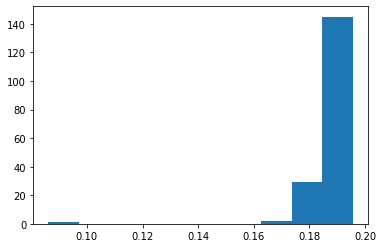

In [65]:
import patsy
from statsmodels.regression.linear_model import OLS
import sklearn.model_selection as sks
import sklearn.linear_model as skm
import matplotlib.pyplot as plt

# define a string with regression equation
eq = 'lsalary ~ lsales + lmktval + profmarg + comten + comtensq + ceoten + ceotensq + age + college + grad'

# build a design matrix with the formula
y,X = patsy.dmatrices(eq, data=ceosal2, return_type = 'dataframe')

# do OLS regression
model = OLS(y,X).fit()

# print summary of regression
print(model.summary())

# create empty list to store LeaveOutOne betas
betas = []

# run LeaveOneOut cross validation
loo = sks.LeaveOneOut()
for train, test in loo.split(ceosal2_array):
    # run a regression and obtain beta for lsales
    beta_value = float((skm.LinearRegression().fit(X.loc[train],y.loc[train]).coef_)[:,1])
    
    # store beta value as a float
    betas.append(beta_value)

# create histogram of betas
plt.hist(betas)
plt.show()